In [1]:
import sys; sys.path.append('../')
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import sys, os, random
import pickle, gzip
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import utils, encoders

In [2]:
data, labels = utils.getSubsetFile("sample.pkl.gz")

In [3]:
select = (labels["rtype"] == 3) | (labels["rtype"] == 4) | (labels["rtype"] == 5)
labels2 = labels[select]
data2 = data[select]

In [4]:
print("filtered labels: {}".format(labels2.shape))

filtered labels: (5906, 5)


In [5]:
labels2.head()

,sample,segment,frame,btype,rtype
id,,,,,
10002_27_358669,10002,27,358669,1,3
10002_29_667655,10002,29,667655,1,3
10002_38_830712,10002,38,830712,1,3
10002_42_91618,10002,42,91618,2,3
10002_46_549611,10002,46,549611,1,3


In [6]:
from sklearn.manifold import TSNE
random.seed(0);np.random.seed(0)
model = TSNE(n_components=2,random_state=1, perplexity=30)
X_embedded = model.fit_transform(data2)

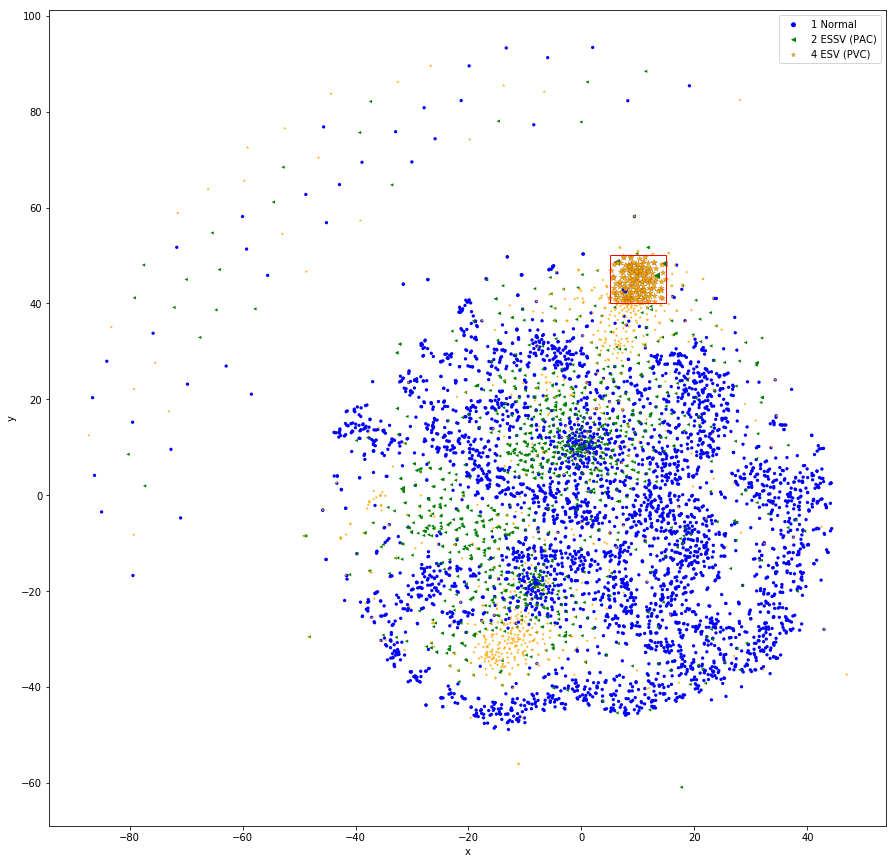

In [7]:
# edit these variables:
xy = (5,40); width = 10; height=10
rect = matplotlib.patches.Rectangle(xy,width,height,linewidth=1,edgecolor='r',facecolor='none')
def highlight(X,Y):
    return (X > rect._x0) & (X < rect._x1) & (Y > rect._y0) & (Y < rect._y1)

fig,ax = plt.subplots(1, figsize=(15,15))
selected_labels = labels2["btype"]
np.random.seed(0)
markers = ["+","o","<",".","*",">",",","p","3"]
colors = ["red","blue","green","yellow", "orange", "black", "purple"]
for cat in np.unique(selected_labels):
    i_cat = np.where(selected_labels == cat)
    
    X = X_embedded[i_cat][:,0]
    Y = X_embedded[i_cat][:,1]

    size = np.ones(X.shape)+10
    size[highlight(X,Y)] = 40
    
    linewidths = np.zeros(X.shape)
    linewidths[highlight(X,Y)] = 0.1
    
    plt.scatter(X, Y, 
                label=utils.btype_names[cat], 
                marker=markers[cat], 
                color=colors[cat],
                s=size,
                linewidths=linewidths,
                edgecolors="black");
    plt.xlabel("x"); plt.ylabel("y")

ax.add_patch(rect)
plt.legend();plt.show();

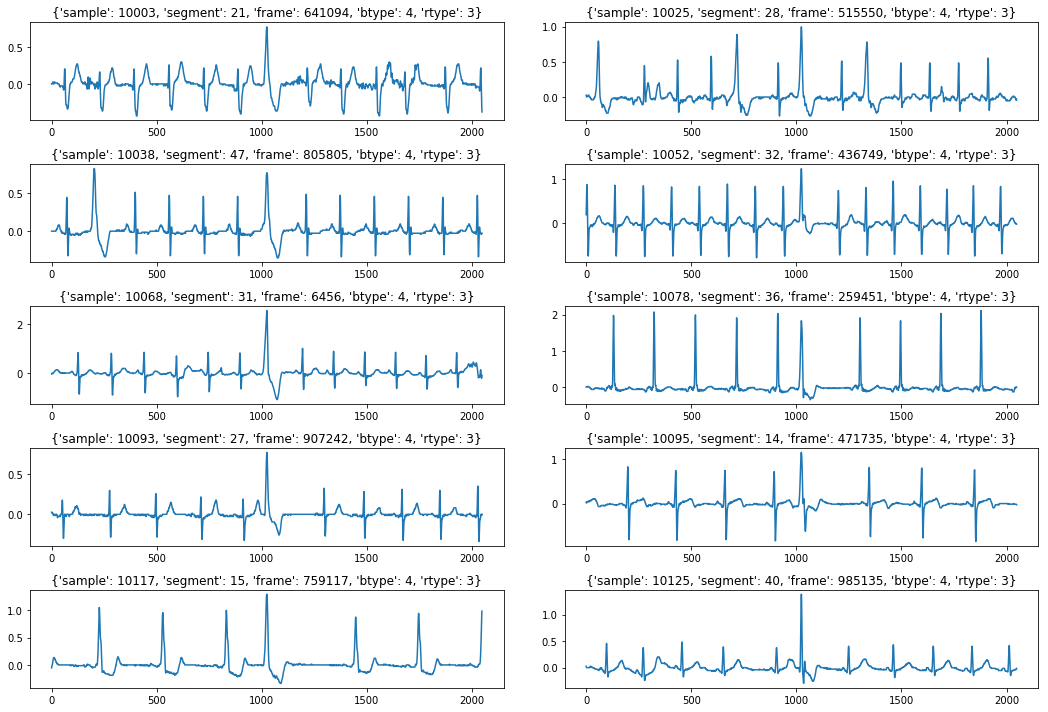

In [8]:
frames = data[select][highlight(X_embedded[:,0],X_embedded[:,1])]
frame_labels = labels[select][highlight(X_embedded[:,0],X_embedded[:,1])]
plt.figure(figsize=(15,10))
rows, columns = 5, 2
for i, ((id, frame),(id,label)) in enumerate(zip(frames[:10].iterrows(),frame_labels[:10].iterrows())):
    plt.subplot(rows, columns, i+1)
    plt.plot(frame.values);
    plt.title(dict(label))
plt.tight_layout()
plt.show()